# Online Social Platform - numerical solution

### Anastasios Giovanidis, Bruno Baynat, Clemence Magnien, Antoine Vendeville

### Code related to the submission "Ranking Online Social Users by their Influence" and also to the accepted INFOCOM 2019 paper: "Performance Analysis of Online Social Platforms"

08 mai 2020

We present here the numerical solution for social platforms of small number of nodes, for which the matrix-inversion and the vector-matrix multiplication do not pose calculation difficulties, so we use a direct approach to program the solution. For sparse implementation that considers millions of users, see "SparseOSP.ipynb"

**Model:** We analyse the influence of users in a generic online social platform. 

In such a platform, there are $N>2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M>0$ and the Wall of size $K>0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

**Assumptions:** The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$Pvec(i):=(Pvec(1,i),\ldots,Pvec(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Qvec(i):=(Qvec(1,i),\ldots,Qvec(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users. 

### Linear System solution (Theorem 2 from paper)

To find the values of the steady-state vectors $Pvec(i)$ and Qvec(i), one needs to solve the following linear system (formulas (12)-(13)):

    (12) Pvec(i) = A.Pvec(i) + b(i)

    (13) Qvec(i) = C.Pvec(i) + d(i).

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

## Implementation

**Notes:** For the implementation, we first generate an input from graphs of specific form. We choose here as a means of example to generate a Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The current implementation will fill in the matrices A,C and the vectors b,d for any user and perform the matrix calculations presented in the paper. The methods to solve can be found as Theorem 3 and Theorem 4. Due to memory constraints, the current PYTHON implementation can allow for up to $N=22500$ users (tested, takes about 15 mins), depending on the local RAM. For more users, a sparse version of the algorithm will be provided in the future.

The current implementation was tested with a MacBook Pro 2013, Processor: 2,3 GHz Intel Core i7, Memory 16GB 1600MHz DDR3.

The runtime heavily depends on the input values and the input graph. 

 - Example 1: for Grid Graph, Lvec1, Mvec1, and $N=400$ users, the method (M1) converged after $T_1= 0.109$ secs, while the method (M2) took $T_2=0.117$ secs (for all N users).


 - Example 2: for Ring Graph, Rvec1, Lvec1, Mvec1, and $N=1100$ users, the method (M1) converged after $T_1 = 167.2$ secs, while the method (M2) took $T_2=128.2$ secs (for all N users).


 - Example 3: for Grid Graph, Lvec1, Mvec1, and $N=2500$ users, the method (M1) converged after $T_1=2.36$ secs while the method (M2) took $T_2=8.67$ secs (for all N users).


 - Example 4: for Ring Graph, Rvec1, Lvec1, Mvec1, and $N=1500$ users, the method (M1) converged after $T_1=393.78$ secs while the method (M2) took $T_2=324.76$ secs (for all N users).


 - Example 5: for Grid Graph, Lvec1, Mvec1, and $N=12100$ users, the method (M1) took $T_1 = 131.75$ secs to derive the final result for all $N$ users. The method (M2) converged in $T_2 = 821.33$ secs.

The time of convergence of (M2) depends on the maximum number of iterations and the epsilon in the convergence criterion $||p_{neq}-p_{old}||_{\infty}<eps$. We set: $it =1000$ and $eps = 0.0001$ by default. Note that the implementation of (M2) is not sparse. The implementation (M2) is not optimal in a programming sense, and the code can profit from several improvements that can make better use of memory consumption and run-time. Still, this simple version outperforms (M1) in Examples 2 and 4, where the graph structure is non-symmetric (random choice of ring radius per node).

In [1]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


## 1. Input Graphs

We first would like to generate the input graphs for our Social platform. 

We propose two graph categories:
(a) Ring Graph, (b) Grid.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $Lvec$ and $Mvec$ (3) Leader graph (either NxN or list). 

For the special case of Ring, a radius $R$ should also be defined, which determines the number of leaders per user.

In [2]:
# Number of users in Social graph
#N = pow(110,2)
N=25
print("N=",N)

N= 25


### A. Ring Graph

First we determine the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

**Note:** In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. Rvec[0] refers to the number of leaders for user "0", and similarly Rvec[n] for user "n".

In [3]:
# INPUT RADIUS
# defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)
#
print("Rvec1=",Rvec1,"\n")
print("Rvec2=",Rvec2,"\n")
print("Rvec3=",Rvec3,"\n")

Rvec1= [ 5  5 10  9  0  6 10  8  7 10  7  4  3  7  5 10  7 10 11  2  2  6  1  9
 10] 

Rvec2= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Rvec3= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 



In [4]:
def ring_graph(N, Rvec, lead=1, sym=1):
    # Produces a list of Leaders, i.e. Lead[j] is the list of leaders for node j.
    #
    # The function allows for some variations:
    # Option lead =1: Vector Rvec is for leaders (Rvec[n] is the list of leaders for node n)
    # Option lead =0: Vector Rvec is for followers (Rvec[n]) is the list of followers for node n)
    #
    # Option sym =1: case of symmetric leaders R right and R left of a user
    # Option sym =0: non-symmetric leaders 2R at the right only.
    #
    Lead = list()
    #
    if lead==1 and sym==1:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==1 and sym==0:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==0 and sym==1:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    elif lead==0 and sym==0:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
            
    return Lead

Similarly as above we use List-of-Lists for the set of Leaders per user, so that LeadRing[n] is the set of Leaders for user "n". Note that alternatively, we could have code it by using a Dictionary.

In [5]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)
print("Rvec=",Rvec1)
print("LeadRing=",LeadRing)

Rvec= [ 5  5 10  9  0  6 10  8  7 10  7  4  3  7  5 10  7 10 11  2  2  6  1  9
 10]
LeadRing= [[1, 2, 3, 4, 5, 24, 23, 22, 21, 20], [2, 3, 4, 5, 6, 0, 24, 23, 22, 21], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 0, 24, 23, 22, 21, 20, 19, 18, 17], [4, 5, 6, 7, 8, 9, 10, 11, 12, 2, 1, 0, 24, 23, 22, 21, 20, 19], [], [6, 7, 8, 9, 10, 11, 4, 3, 2, 1, 0, 24], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 5, 4, 3, 2, 1, 0, 24, 23, 22, 21], [8, 9, 10, 11, 12, 13, 14, 15, 6, 5, 4, 3, 2, 1, 0, 24], [9, 10, 11, 12, 13, 14, 15, 7, 6, 5, 4, 3, 2, 1], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 8, 7, 6, 5, 4, 3, 2, 1, 0, 24], [11, 12, 13, 14, 15, 16, 17, 9, 8, 7, 6, 5, 4, 3], [12, 13, 14, 15, 10, 9, 8, 7], [13, 14, 15, 11, 10, 9], [14, 15, 16, 17, 18, 19, 20, 12, 11, 10, 9, 8, 7, 6], [15, 16, 17, 18, 19, 13, 12, 11, 10, 9], [16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5], [17, 18, 19, 20, 21, 22, 23, 15, 14, 13, 12, 11, 10, 9], [18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 16, 15, 14, 13, 12, 11,

We will now draw the produced directed Leader Graph.

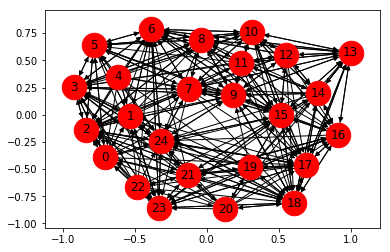

In [6]:
import networkx as nx
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadRing[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
nx.draw_networkx(Gring,arrows=True,with_labels=True,node_size=600,node_color='r')

### B. Grid Graph

In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [7]:
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])

    return Lead

In [8]:
LeadGrid = grid_graph(N)
print("LeadGrid=",LeadGrid)

LeadGrid= [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9], [6, 0, 10], [11, 1, 7, 5], [12, 2, 8, 6], [13, 3, 9, 7], [8, 4, 14], [11, 5, 15], [16, 6, 12, 10], [17, 7, 13, 11], [18, 8, 14, 12], [13, 9, 19], [16, 10, 20], [21, 11, 17, 15], [22, 12, 18, 16], [23, 13, 19, 17], [18, 14, 24], [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]


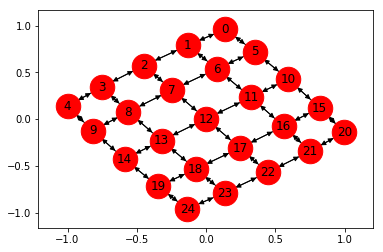

In [9]:
if type(LeadGrid) is list:
    Ggrid=nx.DiGraph()
    for n in range(N):
        ln = list()
        ln = LeadGrid[n]
        for j in range(len(ln)):
            Ggrid.add_edge(ln[j],n)
#Uncomment below to Draw
pos=nx.spring_layout(Ggrid,iterations=100)
nx.draw_networkx(Ggrid,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## 2. Performance evaluation

### General input 
We first define the general input (1) and (2) related to size and activity.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [10]:
# GENERAL INPUT (N, Lvec, Mvec)
print("N=",N,'\n') # network size SEE ABOVE
#
# ACTIVITY
# Activity Scenario case 1: random activity
Amax = 10 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

N= 25 

Lvec1= [7.31318 0.30706 0.74717 9.06616 7.7323  7.54921 5.5582  0.0139  3.45768
 7.06878 3.62493 7.96518 4.83862 9.33534 1.20301 2.68201 4.49931 8.17112
 0.7987  7.24493 1.99073 3.59841 4.51622 4.83624 5.91625] 
 Mvec1= [9.59789 1.62183 1.13446 0.38025 1.67348 7.14703 9.58808 9.81284 9.67119
 9.934   0.56792 0.17666 7.00783 6.11514 2.77114 9.93236 7.27939 4.7053
 9.08751 5.56121 0.32029 7.36311 6.43735 8.68159 6.47927] 

Lvec2= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] 
 Mvec2= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] 

Lvec3= [10.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.] 
 Mvec3= [0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1. ] 



**CURRENT INPUT PARAMETERS**

A summary of the input chosen:

In [11]:
print("N=",N,'\n')
Lvec = Lvec1
print("Lvec=",Lvec,'\n')
Mvec = Mvec1
print("Mvec=",Mvec,'\n')
Rvec = Rvec1
print("Rvec=",Rvec,'\n')

N= 25 

Lvec= [7.31318 0.30706 0.74717 9.06616 7.7323  7.54921 5.5582  0.0139  3.45768
 7.06878 3.62493 7.96518 4.83862 9.33534 1.20301 2.68201 4.49931 8.17112
 0.7987  7.24493 1.99073 3.59841 4.51622 4.83624 5.91625] 

Mvec= [9.59789 1.62183 1.13446 0.38025 1.67348 7.14703 9.58808 9.81284 9.67119
 9.934   0.56792 0.17666 7.00783 6.11514 2.77114 9.93236 7.27939 4.7053
 9.08751 5.56121 0.32029 7.36311 6.43735 8.68159 6.47927] 

Rvec= [ 5  5 10  9  0  6 10  8  7 10  7  4  3  7  5 10  7 10 11  2  2  6  1  9
 10] 



**Choose between Ring and Grid graph:**

In [12]:
# In case we choose Grid:
#Lead = grid_graph(N)
# In case we choose Ring:
Lead = ring_graph(N,Rvec,lead=1,sym=1)
#
print("Lead=",Lead)

Lead= [[1, 2, 3, 4, 5, 24, 23, 22, 21, 20], [2, 3, 4, 5, 6, 0, 24, 23, 22, 21], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 0, 24, 23, 22, 21, 20, 19, 18, 17], [4, 5, 6, 7, 8, 9, 10, 11, 12, 2, 1, 0, 24, 23, 22, 21, 20, 19], [], [6, 7, 8, 9, 10, 11, 4, 3, 2, 1, 0, 24], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 5, 4, 3, 2, 1, 0, 24, 23, 22, 21], [8, 9, 10, 11, 12, 13, 14, 15, 6, 5, 4, 3, 2, 1, 0, 24], [9, 10, 11, 12, 13, 14, 15, 7, 6, 5, 4, 3, 2, 1], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 8, 7, 6, 5, 4, 3, 2, 1, 0, 24], [11, 12, 13, 14, 15, 16, 17, 9, 8, 7, 6, 5, 4, 3], [12, 13, 14, 15, 10, 9, 8, 7], [13, 14, 15, 11, 10, 9], [14, 15, 16, 17, 18, 19, 20, 12, 11, 10, 9, 8, 7, 6], [15, 16, 17, 18, 19, 13, 12, 11, 10, 9], [16, 17, 18, 19, 20, 21, 22, 23, 24, 0, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5], [17, 18, 19, 20, 21, 22, 23, 15, 14, 13, 12, 11, 10, 9], [18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7], [19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 17, 16, 15, 14, 13, 12, 11, 10, 9

From the Linear System solution, one realises that it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system. 

**Note** As a first simple approach, we will actually keep in memory entire $N\times N$ matrices, an approach that limits our possibilities related to social platform dimension. Still a matrix with a sufficient number of users e.g. up to $10^5$ is feasible and in reasonable run-time. For larger networks, memory will play an issue and techniques using sparse matrices should be used. 

In [13]:
def fill_A(N,Lvec,Mvec,Lead):
    A = np.zeros((N,N))
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    Som = np.zeros(N)
    for j in range(N):
        Som[j] = sum(Lvec[Lead[j]]+Mvec[Lead[j]])
        for n in range(len(Lead[j])):
            k = Lead[j][n]
            A[j,k] = Mvec[k]/Som[j]
    return A

In [14]:
A = fill_A(N,Lvec,Mvec,Lead)
print(A)

[[0.         0.01853554 0.01296549 0.00434579 0.01912583 0.08168183
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00366052 0.08415136 0.07357105 0.09921997
  0.07405015]
 [0.08323132 0.         0.00983785 0.00329747 0.01451214 0.06197786
  0.08314625 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.06385167 0.05582364 0.07528531
  0.05618716]
 [0.0441521  0.00746072 0.         0.00174922 0.00769832 0.03287768
  0.04410697 0.04514091 0.04448929 0.04569827 0.00261254 0.00081267
  0.03223733 0.         0.         0.         0.         0.02164526
  0.04180425 0.02558261 0.00147339 0.03387169 0.02961302 0.03993694
  0.02980586]
 [0.05131052 0.00867034 0.00606485 0.         0.00894646 0.03820817
  0.05125807 0.05245965 0.05170238 0.05310737 0.00303611 0.00094443
  0.037464   0.         0.         0. 

In [15]:
def fill_C(N,Lvec,Mvec):
    C = np.zeros((N,N))
    # C is diagonal.
    #
    for j in range(N):
        if Lvec[j]+Mvec[j]>0:
            C[j][j] = Mvec[j]/(Lvec[j]+Mvec[j])
    return C

In [16]:
C = fill_C(N,Lvec,Mvec)
print(C)

[[0.56755072 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.84081    0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.60291343 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.04025339 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [17]:
def fill_bi(i,N,Lvec,Mvec,Lead):
    bi = np.zeros(N)
    for j in range(N):
        if i in Lead[j]:
            bi[j] = Lvec[i]/sum(Lvec[Lead[j]]+Mvec[Lead[j]])
    return bi

In [18]:
bi = fill_bi(0,N,Lvec,Mvec,Lead)
print(bi)

[0.         0.06341869 0.033642   0.03909641 0.         0.06124497
 0.03481543 0.04348848 0.         0.03510298 0.         0.
 0.         0.         0.         0.03210285 0.         0.03629178
 0.03274269 0.         0.         0.06101365 0.         0.04067382
 0.03465065]


In [19]:
#print(A.dot(bi)+bi)

In [20]:
def fill_di(i,N,Lvec,Mvec):
    di = np.zeros(N)
    di[i] = Lvec[i]/(Lvec[i]+Mvec[i])
    return di

In [21]:
di = fill_di(0,N,Lvec,Mvec)
print(di)

[0.43244928 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point. There are two methods:

**(M.1) the first method is based on matrix inversion (Theorem 3)** 

$p_i = (I_N-A)^{-1}b_i$, and

$q_i = Cp_i + d_i$.


We first solve the system for a specific label $i$.

In [22]:
def pi_method1(i,N,Lvec,Mvec,Lead):
    A = fill_A(N,Lvec,Mvec,Lead)
    C = fill_C(N,Lvec,Mvec)
    bi = fill_bi(i,N,Lvec,Mvec,Lead)
    di = fill_di(i,N,Lvec,Mvec)
    IN = np.eye(N)
    #
    pi = (np.linalg.inv(IN-A)).dot(bi)
    
    return pi

In [23]:
pi1 = pi_method1(0,N,Lvec,Mvec,Lead)
print(pi1)

[0.03471682 0.09653942 0.06488605 0.07101233 0.         0.08840776
 0.06447989 0.06881222 0.02862136 0.06222964 0.02694508 0.0300328
 0.02481926 0.03044273 0.02540976 0.06322217 0.03080146 0.06794015
 0.06039112 0.04372238 0.04120389 0.09423496 0.0547094  0.07433986
 0.06852604]


For the solution of all labels $i=1,...,N$ one needs to calculate the matrix inverse only once, which saves a lot of computation.

Furthermore the vector $bi$ has very few non-zero entries, a fact that can be profitable towards acceleration of the computation time. 

In [24]:
import time
StartT1 = time.time()

In [25]:
def solution_m1(N,Lvec,Mvec,Lead):
    #
    # Newsfeed
    P = np.zeros((N,N))
    #
    A = fill_A(N,Lvec,Mvec,Lead)
    #
    IN = np.eye(N)
    #
    invIA = np.linalg.inv(IN-A) 
    #
    for i in range(N):
        #if i%100 ==1:
            #print(i)
        bi = fill_bi(i,N,Lvec,Mvec,Lead)
        # 1) Very slow method that needs to calculate every time the inverse:
        #P[:,i] = pi_method1(i,N,Lvec,Mvec,Lead) 
        # 2) Fast method that calculates the inverse just once:
        # P[:,i] = (invIA).dot(bi)
        # 3) Faster method that calculates the inverse once, AND adds only the non-zero elements of bi vector.
        iN0 = np.nonzero(bi)[0]
        P[:,i] = invIA[:,iN0].dot(bi[iN0])   
    #
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    #
    Q = C.dot(P) + D
    #
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [26]:
[P1,Q1,Psi1] = solution_m1(N,Lvec,Mvec,Lead)
StopT1 = time.time()
#
TotalT1 = StopT1-StartT1
print("Elapsed Time ", TotalT1,"\n")
print("P1=",P1,"\n")
print("Q1=",Q1,"\n")
print("Psi1=",Psi1,"\n")

Elapsed Time  0.022985219955444336 

P1= [[3.47168207e-02 5.05653740e-03 1.24123582e-02 1.39582906e-01
  1.19288753e-01 1.09952783e-01 1.88799755e-02 4.71024637e-05
  8.63043448e-03 2.08704539e-02 9.37793860e-03 2.06358314e-02
  7.48780229e-03 1.43898269e-02 3.54384062e-03 1.07987283e-02
  1.56204147e-02 3.31267282e-02 3.26493973e-03 2.68967698e-02
  3.16723312e-02 6.94773887e-02 7.12347303e-02 9.13778623e-02
  9.58394117e-02]
 [9.65394213e-02 1.81350333e-03 1.08973303e-02 1.22609970e-01
  1.04783537e-01 9.67605522e-02 6.49574784e-02 4.86699179e-05
  9.38660593e-03 2.28369460e-02 1.06511933e-02 2.34375846e-02
  9.47266587e-03 1.86133872e-02 3.89106717e-03 1.11661360e-02
  1.59343338e-02 3.01138648e-02 2.91433483e-03 2.40056737e-02
  9.96550141e-03 6.05426729e-02 6.20307725e-02 7.98643958e-02
  8.40843948e-02]
 [6.48860544e-02 3.07899716e-03 4.13878252e-03 8.40641011e-02
  7.18419047e-02 6.52892794e-02 4.44070125e-02 1.15472448e-04
  2.67621552e-02 6.38111133e-02 3.31064445e-02 7.284959

**(M2) The second method is based on the fixed point convergence (Theorem 4)**

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$.

In [27]:
def pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .0001):
    # This method resolves the fixed-point.
    #
    A = fill_A(N,Lvec,Mvec,Lead)
    bi = fill_bi(i,N,Lvec,Mvec,Lead)
    #
    # Initialisation (the result should be independent)
    #
    pi0 = np.ones(N)/N
    p_new = list(pi0)
    p_new = np.asarray(p_new)
    p_old = np.zeros(N)
    #
    t = 0
    while (t<it) & (np.linalg.norm(p_old-p_new,ord=inf)>eps):
        p_old = list(p_new)
        p_old = np.asarray(p_old)
        p_new = list(A.dot(p_old)+bi)
        p_new = np.asarray(p_new)
        t += 1
    
    #print("t=",t,"\n")
    return p_new

In [28]:
pi2 = pi_method2(0,N,Lvec,Mvec,Lead)
#print("pi1=",pi1,"\n","pi2=",pi2,"\n")
print("pi2=",pi2,"\n")

pi2= [0.034653   0.09647269 0.06481773 0.07094228 0.         0.08834763
 0.06441049 0.0687512  0.02856056 0.06216312 0.02688093 0.0299546
 0.02475588 0.0303668  0.02534056 0.06314833 0.03072701 0.06786169
 0.06032224 0.04363859 0.04110822 0.09415298 0.0546151  0.07426591
 0.06845073] 



In [29]:
#sum(pi2)

In [30]:
def solution_m2(N,Lvec,Mvec,Lead,it = 1000, eps = .0001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    # Newsfeed
    P_old = np.zeros((N,N))
    B = np.zeros((N,N))
    #
    for i in range(N):
        # Slow: repeat pi_method2 for all i
        # P[:,i] = pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .0001)
        # Fast: Do one iteration for matrix P and B.
        B[:,i] = fill_bi(i,N,Lvec,Mvec,Lead)
    P0 = np.ones((N,N))/N
    P_new = list(P0)
    P_new = np.asarray(P_new)
    #
    t = 0
    while (t<it) & (np.linalg.norm(P_old-P_new,ord=inf)>eps):
        P_old = list(P_new)
        P_old = np.asarray(P_old)
        P_new = list(A.dot(P_old)+B)
        P_new = np.asarray(P_new)
        t += 1
    
    P = list(P_new)
    P = np.asarray(P)
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    #
    Q = C.dot(P) + D
    #
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    
    return [P,Q,Psi]

In [31]:
StartT2 = time.time()

In [32]:
[P2,Q2,Psi2] = solution_m2(N,Lvec,Mvec,Lead)
StopT2 = time.time()
TotalT2 = StopT2-StartT2
print("Elapsed Time ", TotalT2,"\n")
print("P2=",P2,"\n")
print("Q2=",Q2,"\n")
print("Psi2=",Psi2,"\n")
print("Psi1=",Psi1,"\n")

Elapsed Time  0.014303207397460938 

P2= [[3.47152429e-02 5.05975115e-03 1.24152069e-02 1.39580274e-01
  1.19286999e-01 1.09951582e-01 1.88803916e-02 5.05557318e-05
  8.63211729e-03 2.08687814e-02 9.37871366e-03 2.06333742e-02
  7.48855864e-03 1.43875124e-02 3.54638511e-03 1.07999050e-02
  1.56211295e-02 3.31238416e-02 3.26779448e-03 2.68956134e-02
  3.16740995e-02 6.94769035e-02 7.12350355e-02 9.13767600e-02
  9.58382320e-02]
 [9.65377716e-02 1.81686368e-03 1.09003089e-02 1.22607219e-01
  1.04781702e-01 9.67592963e-02 6.49579135e-02 5.22807073e-05
  9.38836550e-03 2.28351972e-02 1.06520037e-02 2.34350153e-02
  9.47345672e-03 1.86109672e-02 3.89372773e-03 1.11673664e-02
  1.59350812e-02 3.01108466e-02 2.91731980e-03 2.40044647e-02
  9.96735031e-03 6.05421656e-02 6.20310916e-02 7.98632433e-02
  8.40831613e-02]
 [6.48843644e-02 3.08243960e-03 4.14183390e-03 8.40612826e-02
  7.18400254e-02 6.52879928e-02 4.44074583e-02 1.19171438e-04
  2.67639577e-02 6.38093218e-02 3.31072747e-02 7.284696

The time of convergence of (M2) depends on the maximum number of iterations and the epsilon in the convergence criterion $||p_{neq}-p_{old}||_{\infty}<eps$. We set: $it =1000$ and $eps = 0.0001$ by default.

**Conclusion:** Hence the two methods bring the same result. For (M1) the inverse is calculated only once for all $i$, however, it can be computetionally very hard to calculate exactly the inverse as the size $N$ of the network increases. (M2) The fixed point iteration can be performed for the matrix $P$ using matrix $B$ containing all vectors $b_i$, hence one iteration is enough (although this will enforce that convergence should be guaranteed for all users $i$, it is thus worse-case criterion). One needs to find the trade-off between calculating the inverse and iterating the fixed point process, to decide what is faster. (see also Examples at the beginning)

Note that the implementation of (M2) is not sparse. The implementation (M2) is not optimal in a programming sense, and the code can profit from several improvements that can make better use of memory consumption and run-time. Still, this simple version outperforms (M1) in Examples 2 and 4 (see above / beginning of implementation), where the graph structure is non-symmetric (random choice of ring radius per node).

Future versions of the implementation will make use of the sparsity of the matrices and vectors to allow for the evaluation of larger graphs, e.g. several millions of users.

## Fin